# Project 01: Collision mini-project
**Due:** Wednesday, Oct 11, 2023 at the start of class<br>
**Name:** (Pranav Advani)

**Description of new physics:** 

I will be modelling a 1-D collision happening in a 1-D vertical box. The collision will be taking place under water and therefore, the gravitational and drag forces have been introduced into the collision. The collision will be assumed to be perfectly elastic assuming no losses during the collision due to the very small dt of 1$\mu s$. One ball will have an initial velocity downwards and the other will have an initial velocity set upwards. 

In [1]:
# Starter collision code
# - Add additional code and text blocks as needed
# - Code for visualizations should go in the next section

import numpy as np

## Constants
dt = 0.000001 # s
tmax = 5 # s
t = [0.] # List to store time values corresponding to position/velocity values
top_barrier = 20 # m
bottom_barrier = 0 # m
g = 9.809 #m/s^2 acceleration due to gravity
rho = 997 #kg/m^3 density of water
Cd = 0.47 #drag coefficient for a sphere

## Object 1 (falling downards and is initially above object 2)
xi1 = 15 # m
vi1 = -1 # m/s
r1 = 0.0005 # m
m1 = 1 # kg
A1 = np.pi*r1**2
KEi1 = 0.5*m1*vi1**2
PEi1 = m1*g*xi1
Etoti1 = KEi1 + PEi1
x1 = [xi1] # List to store position values of ball 1
v1 = [vi1] # List to store velocity values of ball 1
a1 = [-g] # List to store acceleration values of ball 1
Fd1 = [ ] # List to store drag force values of ball 1
KE1 = [KEi1] # List to store kinetic energy values of ball 1
PE1 = [PEi1] # List to store potential energy values of ball 1
Etot1 = [Etoti1] # List to store total energy values of ball 1


## Object 2
xi2 = 5 # m
vi2 = 14 #m /s
r2 = 0.0002 # m
m2 = 2 # kg
A2 = np.pi*r2**2
KEi2 = 0.5*m2*vi2**2
PEi2 = m2*g*xi2
Etoti2 = KEi2 + PEi2
x2 = [xi2] # List to store position values of ball 2
v2 = [vi2] # List to store velocity values of ball 2
a2 = [-g] # List to store acceleration values of ball 2
Fd2 = [ ] # List to store drag force values of ball 2
KE2 = [KEi2] # List to store kinetic energy values of ball 2
PE2 = [PEi2] # List to store potential energy values of ball 2
Etot2 = [Etoti2] # List to store total energy values of ball 2
Etoti12 = Etoti2 + Etoti1
Etot12 = [Etoti12]  # List to store total energy values of ball 1 and 2


#main loop
while t[-1] < tmax:
    
  # Retrieve the kinematic quantities from the previous iteration
    x1_last = x1[-1]
    v1_last = v1[-1]
    x2_last = x2[-1]
    v2_last = v2[-1]
    a1_last = a1[-1]
    a2_last = a2[-1]
    KE1_last = KE1[-1]
    KE2_last = KE2[-1]
    PE1_last = PE1[-1]
    PE2_last = PE2[-1]
    Etot1_last = Etot1[-1]
    Etot2_last = Etot2[-1]
    Etot12_last = Etot12[-1]
    t_last = t[-1]


    # Calculate new physical quantities
    Fd1_new = -0.5*Cd*rho*A1*v1_last**2
    a1_new = -g + (Fd1_new/m1)
    x1_new = x1_last + v1_last * dt
    v1_new = v1_last + a1_new * dt
    KE1_new = 0.5*m1*v1_new**2
    PE1_new = m1*g*x1_new
    Etot1_new = KE1_new + PE1_new

    Fd2_new = -0.5*Cd*rho*A2*v2_last**2
    a2_new = -g + (Fd2_new/m2)
    x2_new = x2_last + v2_last * dt
    v2_new = v2_last + a2_new * dt
    KE2_new = 0.5*m2*v2_new**2
    PE2_new = m2*g*x2_new
    Etot2_new = KE2_new + PE2_new
    
    Etot12_new = Etot1_new + Etot2_new

    t_new = t_last + dt

    # Check for collisions and update kinematic quantities as needed
    if ((x1_new + r1 >= top_barrier) or (x1_new - r1 <= bottom_barrier)):
        v1_new = -v1_new
        
    if ((x2_new + r2 >= top_barrier) or (x2_new - r2 <= bottom_barrier)):
        v2_new = -v2_new
        

    if (np.abs(x1_new - x2_new) <= np.sum(r1+ r2)):
        v1_new = ((v1_last)*(m1 - m2) + (2*m2*v2_last)) / ((m1)+(m2))
        v2_new = ((v2_last)*(m2 - m1) + (2*m1*v1_last)) / ((m1)+(m2))
        
        




    # Append updated quantities to their lists
    x1.append(x1_new)
    x2.append(x2_new)
    v1.append(v1_new)
    v2.append(v2_new)
    a1.append(a1_new)
    a2.append(a2_new)
    Fd1.append(Fd1_new)
    Fd2.append(Fd2_new)
    KE1.append(KE1_new)
    KE2.append(KE2_new)
    PE1.append(PE1_new)
    PE2.append(PE2_new)
    Etot1.append(Etot1_new)
    Etot2.append(Etot2_new)
    Etot12.append(Etot12_new)
    t.append(t_new)

# Note that your visualization code should go in the next section


# Visualizations

**Description of visualizations:** 

*Position vs. Time Plot of the balls*

This type of visualisation has been used since the beginning of the course and, in my opinion, is the most fun and intuitive way of visualizing a collision. The plot shows the position of each ball at distinct points in time over a given time interval. This graph allows us to visualize the collision and all of the other graphs are derived from this one. 

*Velocity vs. Time Plot of the balls*

This type of visualisation has been used since the beginning of the course. Visualising the velocity as a function of time gives us some insight to how the balls collide, how the position changes over time, and how much of an affect the forces have upon the rate of change for the position of the balls. 

*Acceleration vs. Time Plot of the balls*

This type of visualisation has been used since the beginning of the course. Visualising the accleration as a function of time gives us some insight as to how the velocity changes a s afunction of time, and how much of an effect the forces added in this simulation have on the rate of change for the velocity of the ball

*Kinetic Energy vs. Time Plot of the balls*

This is a new type of visualisation I thought would be fitting for this simulation. With the addition of two new forces, there is some energy loss introduced into the simulation. One way to visualise this energy loss is by using a kinetic energy as a function of time plot. The plot shows the sudden changes in kinetic energy during the collisions. This is a new way to visualise collsions that allows us to visualize energy transfer between the balls.

*Potential Energy vs. Time Plot of the balls*

This is a new type of visualization I thought would be fitting for this simulation. With this simulation taking place in a 1D vertical box, the gravitational force has been added into the mix. Thus, using a Gravitational Potential Energy plot would be fitting for this simulation. This new plot aids in visualising the effect of external forces on falling objects. It provides some key insights into how the drag force affects the acceleration of a falling object. This simulation and way of visualisation can be used to see how to maximize the affect of the drag force on a falling object in the least amount of time. 

*Total Energy of each ball and Total Energy of the System vs. Time Plot*

The total energy of each ball and total energy of the system plot ties the kinetic energy and potential energy plot otgether showing energy conservation and how much energy loss takes place over time. By setting different initial values, one can find a way to increase the energy loss of the system in the fastest way possible. 

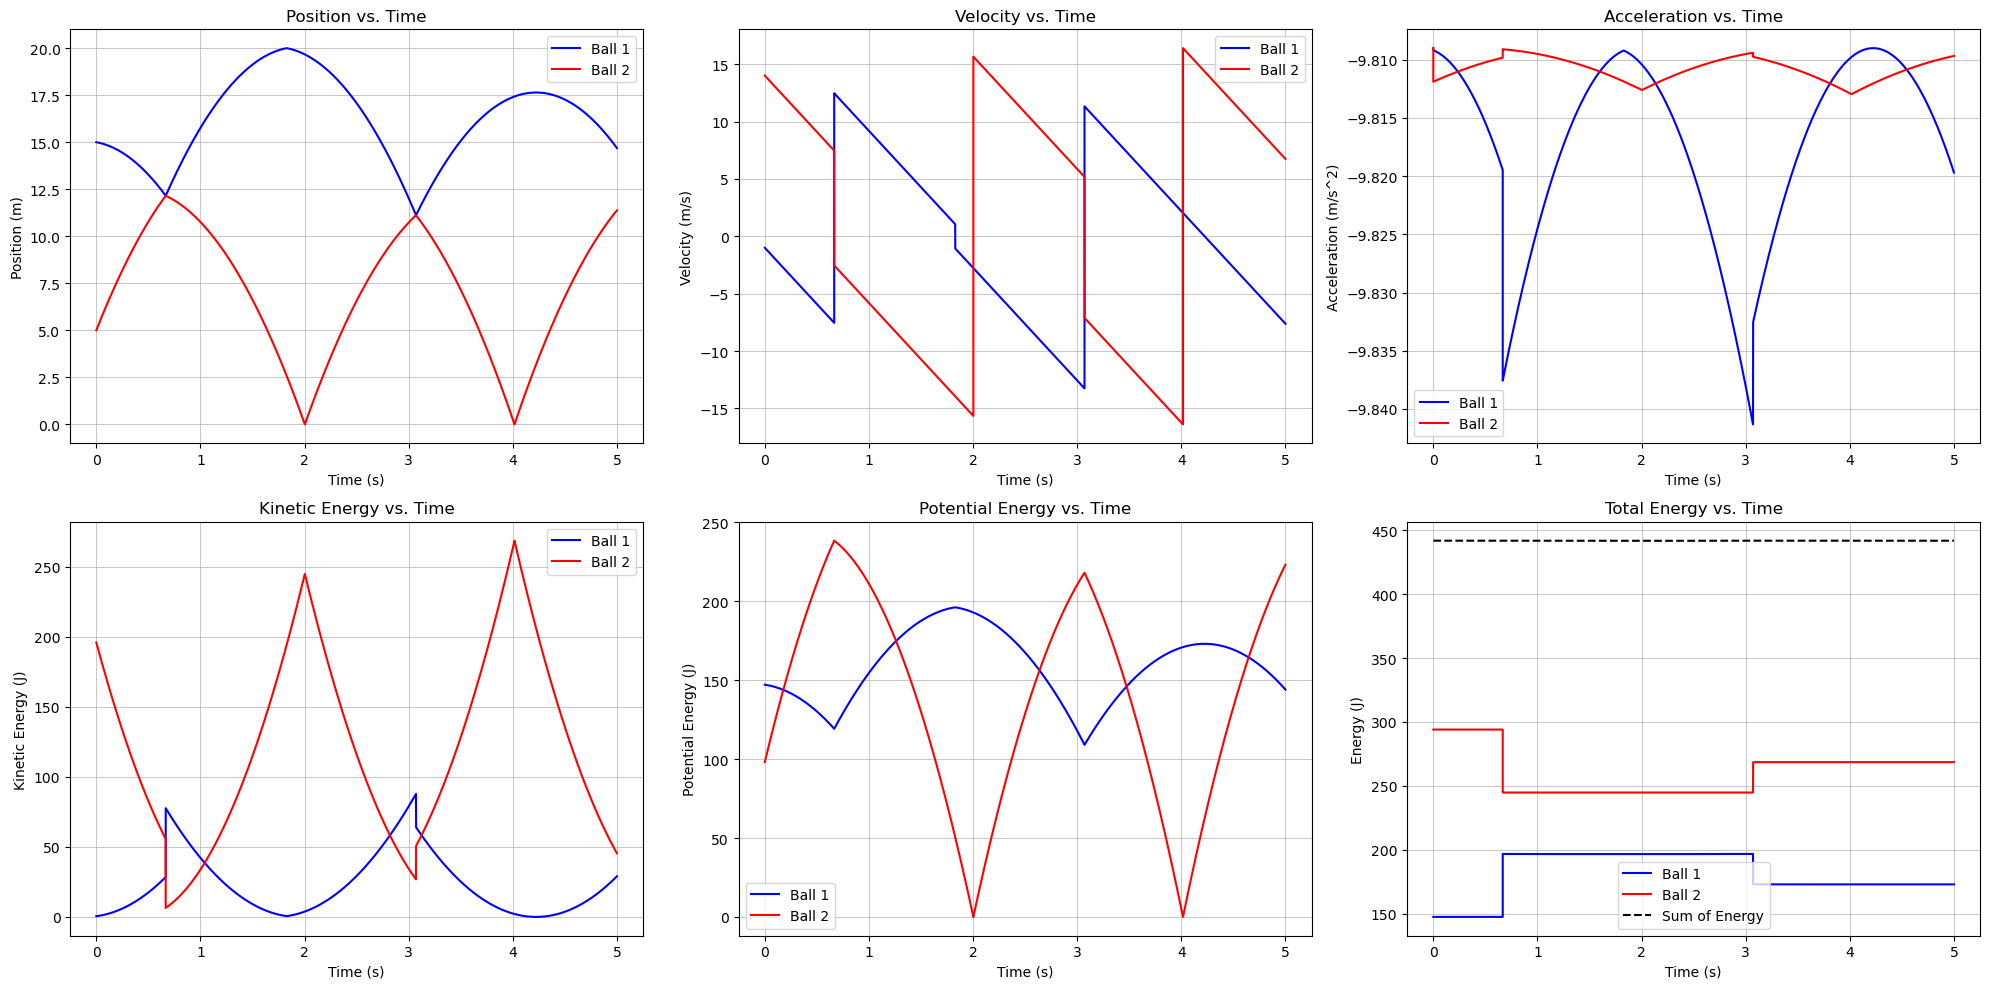

In [2]:
# Your multi-subplot visualization code

## Importing libraries
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))


# Position vs. Time graph of the balls
plt.subplot(2, 3, 1)  # 2 rows, 1 column, select the first subplot
plt.plot(t, x1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, x2, label='Ball 2', color='red', linestyle='-')
plt.title("Position vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Velocity vs. Time graph of the balls
plt.subplot(2, 3, 2)  # 2 rows, 1 column, select the second subplot
plt.plot(t, v1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, v2, label='Ball 2', color='red', linestyle='-')
plt.title("Velocity vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)


# Acceleration vs. Time graph of the balls
plt.subplot(2, 3, 3)  # 2 rows, 1 column, select the second subplot
plt.plot(t, a1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, a2, label='Ball 2', color='red', linestyle='-')
plt.title("Acceleration vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)


# Kinetic Energy vs. Time graph of the balls
plt.subplot(2, 3, 4)  # 2 rows, 1 column, select the second subplot
plt.plot(t, KE1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, KE2, label='Ball 2', color='red', linestyle='-')
plt.title("Kinetic Energy vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Kinetic Energy (J)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)


# Potential Energy vs. Time graph of the balls
plt.subplot(2, 3, 5)  # 2 rows, 1 column, select the second subplot
plt.plot(t, PE1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, PE2, label='Ball 2', color='red', linestyle='-')
plt.title("Potential Energy vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Potential Energy (J)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)


# Total Energy vs. Time graph of the balls
plt.subplot(2, 3, 6)  # 2 rows, 1 column, select the second subplot
plt.plot(t, Etot1, label='Ball 1', color='blue', linestyle='-')
plt.plot(t, Etot2, label='Ball 2', color='red', linestyle='-')
plt.plot(t, Etot12, label='Sum of Energy', color='black', linestyle='--')
plt.title("Total Energy vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend(loc="best")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Comparison of simulation results to calculations
*Below show the results of your simulation compared with your by-hand calculations using two different sets of starting parameters. Make sure to discuss 

Use as many code blocks below as needed for re-running your code with different starting parameters and extracting the relevant quantities. Your calculations only need to be performed for the first collision between the two objects for each set of parameters. Show your calculation work either using LaTeX in the markdown cell or by uploading a document/picture on Canvas as part of your submission.*

**1. Collision Calculation**

Firstly, the collision is assumed to be perfectly elastic, meaning no energy losses during the collision. Thus, we can use the following equaitons

$$m_1 v_{1i} + m_2 v_{2i} = m_1 v_{1f} + m_2 v_{2f}$$

$$\frac{1}{2}m_1 v_{1i}^{2} + \frac{1}{2}m_2 v_{2i}^{2} = \frac{1}{2}m_1 v_{1f}^{2} + \frac{1}{2}m_2 v_{2f}^{2}$$

We are going to be solving for $v_{1f}$ and $v_{2f}$. We have 2 equations and 2 unknowns. Thus, we can find 2 equations that will help us solve for $v_{1f}$ and $v_{2f}$. Those equations are:

$$v_{1f} = \frac{v_{1i}(m_1 - m_2) + 2m_2 v_{2i}}{m_1 + m_2}$$

and  

$$v_{2f} = \frac{v_{2i}(m_2 - m_1) + 2m_1 v_{1i}}{m_1 + m_2}$$


Let's do a calculation with some initial parameters and compare:
The values for this calculation are the values used for the first collision in the plot presented above

$m_1 = 1kg$, $m_2 = 2kg$, $v_{1i} = -7.54 \frac{m}{s}$, $v_{2i} = 7.46 \frac{m}{s}$

using our equation, we get:

$$v_{1f} = \frac{(-7.54)((1) - (2)) + 2(2) (7.46)}{(1) + (2)} = 12.46 \frac{m}{s}$$

and  

$$v_{2f} = \frac{(7.46)((2) - (1)) + 2(1) (-7.54)}{(1) + (2)} = -2.54 \frac{m}{s}$$

This collision occured at $0.6666169999983316s$. Using the time step, we can run a code to print the values of the final velocities the code calculated. 

**Discussion of how your by-hand calculations verify the output of your simulation:** 

My by-hand calculations verify the output of my simulation as it shows whether the physics being simulated in the code is accurate and representative of physics and not something else. It is a good way to verify that the values the code is giving me is equivalent to the values I calculate by hand. 

In [3]:
# Additional code block to run your simulation with new parameters if needed

t_collided_index = 0.6666169999983316//(1e-6) + 1 # this gives us the index of the collision. Subtract 1 to take into account the 0 index. 


if len(t) >= 5000001:
    v1_collided = v1[666617]
    v2_collided = v2[666617]
    print("Velocity of Ball 1 after the collision = ", v1_collided)
    print("Velocity of Ball 2 after the collision = ", v2_collided)
else:
    print("nothing")


#As we can see, my calculated values of the collision match the value that were taken from the code.


Velocity of Ball 1 after the collision =  12.460501982528124
Velocity of Ball 2 after the collision =  -2.5410073891045983


**2. Drag Force Calculation**

Since this simulation involved the drag force, it would be nice to include a small calculation verifying that the drag force was calculated correctly. We will be calculating the initial acceleration of ball 1. This calculation will involve the drage force and the gravitational force. Firstly let us look at a few equations that we will be using. 

$$a_{net} = -|g + a_{D}|$$

$$F_g = mg \Rightarrow g = \frac{F_g}{m}$$

Fd1_new = -0.5*Cd*rho*A1*v1_last**2

$$F_D = -\frac{1}{2} C_d \rho A_1 v_{1i}^{2} \Rightarrow ma_D = -\frac{1}{2} C_d \rho A_1 v_{1i}^{2} \Rightarrow a_D = \frac{-\frac{1}{2} C_d \rho A_1 v_{1i}^{2}}{m}$$

$$a_{net} = -|(g) + (\frac{-\frac{1}{2} C_d \rho A_1 v_{1i}^{2}}{m}) |$$

Let's do a calculation with some initial parameters and compare:

$g = 9.81 \frac{m}{s^2}$,
$C_d = 0.47$,
$\rho = 997 \frac{kg}{m^3}$
$v_{1i} = -1 \frac{m}{s}$,
$m = 1kg$,
$A_1 = \pi(0.0005)^{2}$

From this we can calulate the initial acceleration of ball 1

$$a_{net} = -|(9.81) + (\frac{-\frac{1}{2} (0.47) (997) (\pi(0.0005)^{2}) (-1)^{2}}{1}) | = 9.8091 \frac{m}{s^2}$$


In [4]:
# Another additional code block to run your sumulation with new parameters if needed

if len(t) >= 5000001:
    initial_acceleration_of_ball1 = a1[1]
    print(f"Initial Acceleration of Ball 1 = ", initial_acceleration_of_ball1)
else:
    print("nothing")
    

#Thus, as we can see, the calculated value matches the value from the code.

Initial Acceleration of Ball 1 =  -9.809184014862693
